> ### EEE3314-02: Introduction to Artificial Intelligence

# Assignment \# I: Linear Regression

<div style="text-align: right"> **Due date: Sep. 20, 2019.** </div> 
<div style="text-align: right"> **Please upload your file @ yscec by 8PM in the form of [ID_Name.zip].** </div> 
<div style="text-align: right"> Wonkyung Lee (이원경): <a href="mailto:leewk92@yonsei.ac.kr">leewk92@yonsei.ac.kr</a> </div>
<div style="text-align: right"> Geon Lee (이건): <a href="mailto:2015142195@yonsei.ac.kr"> 2015142195@yonsei.ac.kr</a> </div>

### *Assignement Instructions:*
- Write a program implementing a particular algorithm to solve a given problem.   
- <h4><span style="color:red">**Report and discuss your results. Analyze the algorithm, theoretically and empirically. **</span> </h4>

### *Collaboration policy:*
- You may discuss the questions.   
- Each student writes their own answers.   
- **Write on your homework anyone with whom you collaborate.**   
- Each student must write their own code (<span style="color:red">**if not you will get a F grade**</span>).

<h2><span style="color:blue">[2015142113] [JunYoung Kim]</span> </h2>

In [1]:
import datetime
print("This code is written at " + str(datetime.datetime.now()))

This code is written at 2019-09-19 21:26:52.587560


## Problem description

Let's estimate an exam score for machine intelligence given two other ones for circuits and data structures. Scores for 1,000 students are available ($\texttt{exam_scores.csv}$). You can use $\texttt{linalg.inv}$, transpose, dot operators provided by $\texttt{Numpy}$ when writing codes.

**I. Score distributions**   
(*3 points*) P1.1 Draw a scatter plot for score distributions (X axis: scores for circuits, Y axis: scores for data structures, Z axis: scores for machine intelligence). You can use '$\texttt{scatter}$' from $\texttt{matplotlib.pyplot}$, and '$\texttt{Axes3D}$' from $\texttt{mpl_toolkits.mplot3d}$. 

**II. Linear regression using gradient descent**   
(*40 points*) P2.1 Implement a linear regression method using **gradient descent** and estimate regression coefficients $w_0$, $w_1$, $w_2$ for a bias, a circuit score, and a data structure score, respectively. 

> a. Learning rate = 0.0001   
> b. Number of iterations = 1,000,000    
> c. Loss function = average RSS (i.e., (1/N)*RSS where N(=1,000) is a total number of samples)   
> d. Initialize all weight values to 0.

(*7 points*) P2.2 Predict the Machine Intelligence score when somebody gets 60 for Circuit and 70 for Data Structure.   
(*3 points*) P2.3 Plot an average RSS over number of iterations.  
(*3 points*) P2.4 Draw a plane using estimated regression coefficients ($w_0$, $w_1$, $w_2$). You can use $\texttt{plot_wireframe}$ and $\texttt{meshgrid}$. 

**III. Linear regression without iterations**      
(*20 points*) P3.1 Implement a linear regression method without iterations (**closed form solution**) and estimate weights $w_0$, $w_1$, $w_2$ for a bias, a circuit score, and a data structure score, respectively. Calculate the mean absolute difference between w from P2.1 and P3.1.    
(*4 points*) P3.2 Draw a plane using estimated regression coefficients and compare it with your plot in P2.3.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
%load_ext autoreload
%autoreload 2

# Solve the Problems (80 points)

## P1.1

In [5]:
from P01 import parse_pd_data, read_csv_using_pandas, plot_data

In [6]:
csv_path = 'exam_scores.csv'
data = read_csv_using_pandas(csv_path)

(1000, 3)
   Circuit  DataStructure  MachineIntelligence
0       48             68                   63
1       62             81                   72
2       79             80                   78
3       76             83                   79
4       59             64                   62


In [7]:
fields = ['Circuit', 'DataStructure', 'MachineIntelligence']
values = parse_pd_data(data, fields)

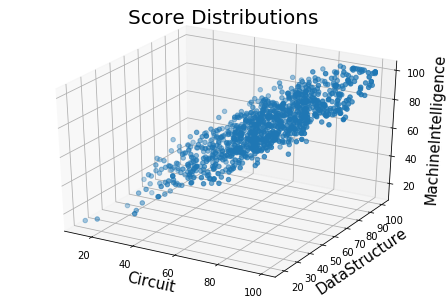

In [8]:
_ = plot_data(values)

## P2.1

In [9]:
from P01 import prepare_dataset_for_linear_regression
from P01 import LinearRegression, plot_average_rss_history

In [10]:
X, y = prepare_dataset_for_linear_regression(values)

In [11]:
#set hyperparameters
lr = 0.0001
iterations = 1000000

In [12]:
model = LinearRegression(lr, iterations)

In [13]:
# linear fitting
model.fit(X, y)

In [14]:
print(model.w)

[[-1.46196898]
 [ 0.09600001]
 [ 0.91049558]]


## P2.2

In [15]:
circuit_score = 60
datastructure_score = 70
model.predict(np.array([1, circuit_score, datastructure_score]))

array([68.03272224])

## P2.3

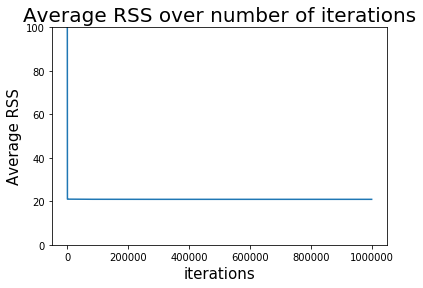

In [16]:
_ = plot_average_rss_history(iterations, model.average_rss_history)

## P2.4

In [17]:
from P01 import plot_data_with_wireframe

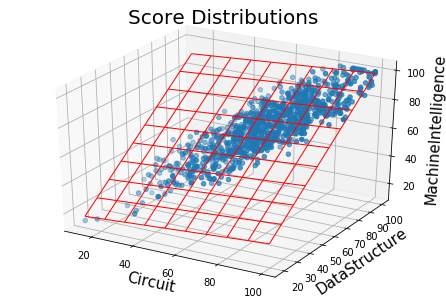

In [18]:
_ = plot_data_with_wireframe(values, model.w, 'red')

## P3.1

In [19]:
from P01 import get_closed_form_solution

In [20]:
w_closed = get_closed_form_solution(X, y)

In [21]:
print(w_closed)

[[-1.46243738]
 [ 0.09600221]
 [ 0.91049989]]


In [22]:
np.mean(np.abs(model.w - w_closed))

0.00015830635199549914

## P3.2

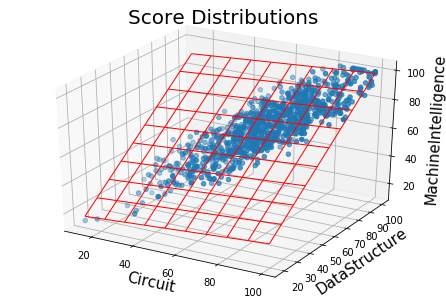

In [23]:
_ = plot_data_with_wireframe(values, model.w, 'red')

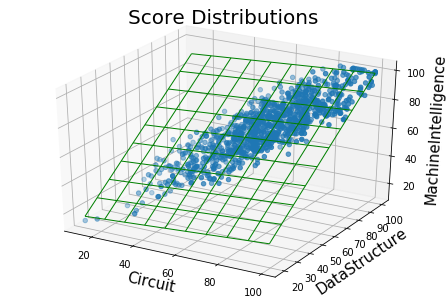

In [28]:
_ = plot_data_with_wireframe(values, w_closed, 'green')


# Result Analysis and Discussion (20 points)



For result analysis and discussion, you can use all functions defined above. Also you can make your own functions or scripts.

Your answer must include the analysis about:
- gradient descent
    - according to learning rate  
    - according to initialization of parameters
    - according to iteration 
- influency of each input.(Circuit, Data Structure)
- difference between parameters from closed-form and gradient descent.

In [29]:
###################### 1. Gradient descent ######################################
###################### Changing learning rate
model_lr1 = LinearRegression(0.001, iterations)
model_lr1.fit(X, y)

model_lr2 = LinearRegression(0.005, iterations)
model_lr2.fit(X, y)

model_lr3 = LinearRegression(0.00005, iterations)
model_lr3.fit(X, y)

model_lr4 = LinearRegression(0.00001, iterations)
model_lr4.fit(X, y)

print(np.mean(np.abs(model_lr1.w - w_closed)))
print(np.mean(np.abs(model_lr2.w - w_closed)))
print(np.mean(np.abs(model.w - w_closed)))
print(np.mean(np.abs(model_lr3.w - w_closed)))
print(np.mean(np.abs(model_lr4.w - w_closed)))

nan
nan
0.00015830635199549914
0.008871854280296415
0.2222399745007375


In [30]:
print(model_lr1.predict(np.array([1, circuit_score, datastructure_score])))
print(model_lr2.predict(np.array([1, circuit_score, datastructure_score])))
print(model_lr3.predict(np.array([1, circuit_score, datastructure_score])))
print(model_lr4.predict(np.array([1, circuit_score, datastructure_score])))

[nan]
[nan]
[68.03461459]
[68.08095243]


The third value is a mean of error from our model's weights.
I could find out that changing learning rate influence weights of our model largely.

When the Learning rate is increased to 0.001 (10 times larger), the mean of error has 'nan' error.
I think that the weights are diverged because of large learning rate.
The step of every trial is too big that the data could't converges to the point that has minimum gradient value.

When the learning rate became 1/2, 1/10 times smaller, The weight error also became bigger.
If the Learning rate is too small, It is easy to fall in local minimum and end the learning.
I think this is why the error became larger according to decreasing of Learning value.

In conclusion, It is very important to set proper learning rate at the beginning of Learning.

In [32]:
from P01 import ranparamLR

###################### Changing the initialization of parameters(weights)
model_ranp1 = ranparamLR(lr, iterations)
model_ranp1.fit(X,y)
model_ranp2 = ranparamLR(lr, iterations)
model_ranp2.fit(X,y)

print(model.w)
print(model_ranp1.w)
print(model_ranp2.w)

print(np.mean(np.abs(model.w - w_closed)))
print(np.mean(np.abs(model_ranp1.w - w_closed)))
print(np.mean(np.abs(model_ranp2.w - w_closed)))

[[-1.46196898]
 [ 0.09600001]
 [ 0.91049558]]
[[-1.46168498]
 [ 0.09599867]
 [ 0.91049297]]
[[-1.4617482 ]
 [ 0.09599897]
 [ 0.91049355]]
0.00015830635199549914
0.00025428999597265173
0.000232922412168828


In [33]:
print(model_ranp1.predict(np.array([1, circuit_score, datastructure_score])))
print(model_ranp2.predict(np.array([1, circuit_score, datastructure_score])))

[68.03274308]
[68.03273844]


I made 2 new models that have randomly initialized parameters.
After my several trials, I found out that the initialization of parameters is not quitely influence the final value.
They also predict the output value almost same as unchanged one.
Because they finally arrived at values that is similar to those with initialized in 0.
However, I think it is good that initializing parameters as 0.
If we set specific value as parameters, It has a possibility that the RSS is local minimum at that point.

In [36]:
###################### Changing iterations
model_it1 = LinearRegression(lr, 3000000)
model_it1.fit(X, y)

model_it2 = LinearRegression(lr, 2000000)
model_it2.fit(X, y)

model_it3 = LinearRegression(lr, 500000)
model_it3.fit(X, y)

model_it4 = LinearRegression(lr, 100000)
model_it4.fit(X, y)

print(np.mean(np.abs(model_it1.w - w_closed)))
print(np.mean(np.abs(model_it2.w - w_closed)))
print(np.mean(np.abs(model.w - w_closed)))
print(np.mean(np.abs(model_it3.w - w_closed)))
print(np.mean(np.abs(model_it4.w - w_closed)))

1.6314648706069097e-11
5.040504081714007e-08
0.00015830635199549914
0.008871782376551193
0.22223932607237917


In [37]:
print(model_it1.predict(np.array([1, circuit_score, datastructure_score])))
print(model_it2.predict(np.array([1, circuit_score, datastructure_score])))
print(model_it3.predict(np.array([1, circuit_score, datastructure_score])))
print(model_it4.predict(np.array([1, circuit_score, datastructure_score])))

[68.03268786]
[68.03268787]
[68.03461457]
[68.08095229]


I compared 4 new models that each has 3000000, 2000000, 500000, 100000 iterations value.
As we can notice at printed value above, the mean of error became smaller if the number of iteration increases.
The larger number of iterations, the more precise result we can have. But it needs more time to calculate it.

###################### 2. Influency of each input ######################################
The output z (MachineIntellegence) of our model is decided by following equation.

         z = 1*w[0] + (Circuit)*w[1] + (DataStructure)*w[2]

Every output z is predicted by our 2 input, Circuit and DataStructure
If we change a training group, which means that values of Circuit and DataStructure are different from these value,
the weight values would be decided in another value. So the output z will be different from previous value.

###################### 3. difference between parameters from closed-form and gradient descent. ######################################
By using closed-form method, We can find out the weight values that minimize RSS.
The gradient of RSS is same as -2X.T(y-Xw), We could decide w as  
         
        w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
        
which is a point that gradient of RSS has 0 value.

However, It is hard to use this method if traning set has very large amount of data.
Finding inverse metrix of huge size metrix is too complicate to do it.
So, We normally use 'gradient descent' method.
This is another way to find the minimum value of RSS.
As starting at specific point, we calculate the gradient of that point and move slicely the opposite direction of that gradient.
The size of move is decided by a learnin rate, and number of calculating is decided by a iterations.
By using this method, we can find the point that has lowest value of gradient of RSS while we don't have to calculate a inverse matrix.
But w decided by 'gradient descent' method could be little bit different with that decided by closed-form method.

Collaborate with PARK YOU SUNG (2015142029)